<a href="https://colab.research.google.com/github/ranasweta/AI_Project_4th_Sem/blob/main/NN_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
print(data.head())
print(data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

# Load the data
data = pd.read_csv('creditcard.csv')

# Print data info to check for missing values
print(data.info())

# ... (rest of your code) ...

# Before splitting, handle NaN values in 'Class'
# Option 1: Remove rows with NaN in 'Class'
data = data.dropna(subset=['Class'])

# Option 2: Impute missing values (e.g., with the most frequent value)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# data['Class'] = imputer.fit_transform(data[['Class']])

# ... (continue with your train_test_split and further processing) ...

X = data.drop('Class', axis=1)
y = data['Class']

# Now proceed with train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283145 entries, 0 to 283144
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283145 non-null  float64
 1   V1      283145 non-null  float64
 2   V2      283145 non-null  float64
 3   V3      283145 non-null  float64
 4   V4      283145 non-null  float64
 5   V5      283145 non-null  float64
 6   V6      283145 non-null  float64
 7   V7      283145 non-null  float64
 8   V8      283145 non-null  float64
 9   V9      283145 non-null  float64
 10  V10     283145 non-null  float64
 11  V11     283145 non-null  float64
 12  V12     283145 non-null  float64
 13  V13     283145 non-null  float64
 14  V14     283145 non-null  float64
 15  V15     283144 non-null  float64
 16  V16     283144 non-null  float64
 17  V17     283144 non-null  float64
 18  V18     283144 non-null  float64
 19  V19     283144 non-null  float64
 20  V20     283144 non-null  float64
 21  V21     28

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print('Class Weights:', class_weight_dict)

Class Weights: {0: np.float64(0.5008697395498581), 1: np.float64(287.94237288135594)}


In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores_cv = {}

NameError: name 'KFold' is not defined

In [12]:
from sklearn.model_selection import KFold, train_test_split # Import KFold
import numpy as np


kfold = KFold(n_splits=5, shuffle=True, random_state=42) # Now you can use KFold
f1_scores_cv = {}

In [13]:
logistic_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)
    logistic_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = logistic_model.predict(X_val_fold)
    logistic_f1_scores.append(f1_score(y_val_fold, y_pred_fold))

f1_scores_cv['Logistic Regression'] = np.mean(logistic_f1_scores)
print(f"Logistic Regression - Mean CV F1-Score: {f1_scores_cv['Logistic Regression']:.4f}")

Logistic Regression - Mean CV F1-Score: 0.1071


In [14]:
def train_nn_model(model, X_train, y_train, X_val, y_val, class_weight_dict):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weight_dict, verbose=0)
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    return f1_score(y_val, y_pred)

In [15]:
model1_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model1 = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    f1 = train_nn_model(model1, X_train_fold, y_train_fold, X_val_fold, y_val_fold, class_weight_dict)
    model1_f1_scores.append(f1)

f1_scores_cv['Model 1 (No Reg)'] = np.mean(model1_f1_scores)
print(f"Model 1 (No Reg) - Mean CV F1-Score: {f1_scores_cv['Model 1 (No Reg)']:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Model 1 (No Reg) - Mean CV F1-Score: 0.1782


In [16]:
model2_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model2 = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(1, activation='sigmoid')
    ])
    f1 = train_nn_model(model2, X_train_fold, y_train_fold, X_val_fold, y_val_fold, class_weight_dict)
    model2_f1_scores.append(f1)

f1_scores_cv['Model 2 (L1)'] = np.mean(model2_f1_scores)
print(f"Model 2 (L1) - Mean CV F1-Score: {f1_scores_cv['Model 2 (L1)']:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Model 2 (L1) - Mean CV F1-Score: 0.1226


In [18]:
model3_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model3 = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(1, activation='sigmoid')
    ])
    f1 = train_nn_model(model3, X_train_fold, y_train_fold, X_val_fold, y_val_fold, class_weight_dict)
    model3_f1_scores.append(f1)

f1_scores_cv['Model 3 (L2)'] = np.mean(model3_f1_scores)
print(f"Model 3 (L2) - Mean CV F1-Score: {f1_scores_cv['Model 3 (L2)']:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model 3 (L2) - Mean CV F1-Score: 0.1265


In [19]:
model4_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model4 = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    f1 = train_nn_model(model4, X_train_fold, y_train_fold, X_val_fold, y_val_fold, class_weight_dict)
    model4_f1_scores.append(f1)

f1_scores_cv['Model 4 (Dropout)'] = np.mean(model4_f1_scores)
print(f"Model 4 (Dropout) - Mean CV F1-Score: {f1_scores_cv['Model 4 (Dropout)']:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Model 4 (Dropout) - Mean CV F1-Score: 0.2872


In [20]:
model5_f1_scores = []
for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model5 = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    f1 = train_nn_model(model5, X_train_fold, y_train_fold, X_val_fold, y_val_fold, class_weight_dict)
    model5_f1_scores.append(f1)

f1_scores_cv['Model 5 (L2 + Dropout)'] = np.mean(model5_f1_scores)
print(f"Model 5 (L2 + Dropout) - Mean CV F1-Score: {f1_scores_cv['Model 5 (L2 + Dropout)']:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1062/1062 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model 5 (L2 + Dropout) - Mean CV F1-Score: 0.1419


In [21]:
best_model_name = max(f1_scores_cv, key=f1_scores_cv.get)
print(f"\nBest Model from Cross-Validation: {best_model_name} with Mean CV F1-Score = {f1_scores_cv[best_model_name]:.4f}")


Best Model from Cross-Validation: Model 4 (Dropout) with Mean CV F1-Score = 0.2872


In [22]:
if best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(class_weight='balanced', max_iter=1000)
    best_model.fit(X_train, y_train)
    y_pred_test = best_model.predict(X_test)
else:
    model_dict = {
        'Model 1 (No Reg)': models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]),
        'Model 2 (L1)': models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.01)),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
            layers.Dense(1, activation='sigmoid')
        ]),
        'Model 3 (L2)': models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
            layers.Dense(1, activation='sigmoid')
        ]),
        'Model 4 (Dropout)': models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dropout(0.5),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(1, activation='sigmoid')
        ]),
        'Model 5 (L2 + Dropout)': models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
            layers.Dropout(0.3),
            layers.Dense(1, activation='sigmoid')
        ])
    }
    best_model = model_dict[best_model_name]
    best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weight_dict, verbose=1)
    y_pred_test = (best_model.predict(X_test) > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9655 - loss: 2.1003 - val_accuracy: 0.9901 - val_loss: 0.0474
Epoch 2/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9425 - loss: 0.3203 - val_accuracy: 0.9885 - val_loss: 0.0596
Epoch 3/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9539 - loss: 0.2618 - val_accuracy: 0.9964 - val_loss: 0.0383
Epoch 4/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9686 - loss: 0.2325 - val_accuracy: 0.9857 - val_loss: 0.1009
Epoch 5/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9603 - loss: 0.2064 - val_accuracy: 0.9927 - val_loss: 0.0388
Epoch 6/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9695 - loss: 0.2424 - val_accuracy: 0.9938 - val_loss: 0.0510
Epoch 7/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9698 - loss: 0.1619 - val_accuracy: 0.9900 - val_loss: 0.0450
Epoch 8/10
5309/5309 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9675 - loss: 0

In [24]:
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nBest Model: {best_model_name}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Best Model: Model 4 (Dropout)
Test Set Accuracy: 0.9911
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56531
         1.0       0.16      0.93      0.27        98

    accuracy                           0.99     56629
   macro avg       0.58      0.96      0.63     56629
weighted avg       1.00      0.99      0.99     56629



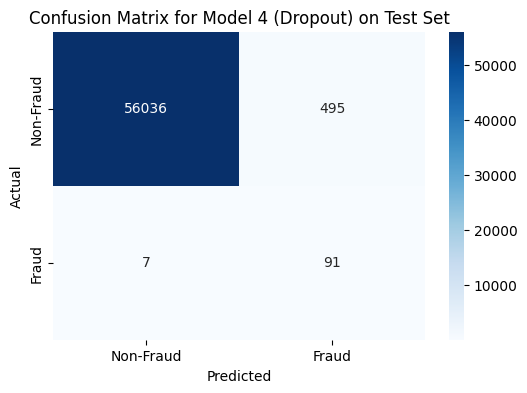

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix # Import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title(f'Confusion Matrix for {best_model_name} on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()